In [1]:
from pathlib import Path
import xarray as xr
import metpy.calc as mpcalc
from metpy.units import units

In [ ]:
data_dir = Path('/mnt/d/data/raw/NCAR/')

In [3]:
uwnd = xr.open_dataset(Path(data_dir, 'uwnd.mon.mean.nc'))
vwnd = xr.open_dataset(Path(data_dir, 'vwnd.mon.mean.nc'))

In [4]:
uwnd = uwnd.sel(time=slice('1979-01', '2025-08'), level=850., lat=slice(50., 0.), lon=slice(100., 180.))
vwnd = vwnd.sel(time=slice('1979-01', '2025-08'), level=850., lat=slice(50., 0.), lon=slice(100., 180.))

In [5]:
vort = mpcalc.vorticity(uwnd.uwnd, vwnd.vwnd)

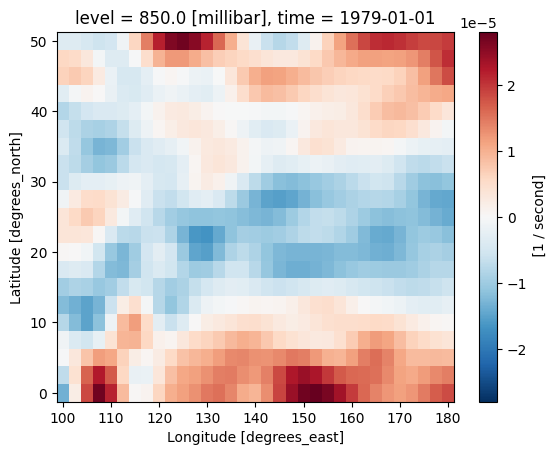

In [6]:
vort[0].plot()

In [7]:
ds = xr.Dataset(
    data_vars={
        'uwind': uwnd.uwnd,
        'vwind': vwnd.vwnd,
        'vorticity': vort,
    },
    coords={
        'time': vort.time,
        'longitude': vort.lon,
        'latitude': vort.lat,
    },
)

In [8]:
ds.to_netcdf('data/nwp_vorticity_197901_202508.nc')